Link to the dataset: https://drive.google.com/drive/folders/1H6MhJefZ7DlNZ_yhkIyaoennSQvyonRR?usp=sharing

In [1]:
%matplotlib inline
 
import matplotlib.pyplot as plt
import numpy as np
import os
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [2]:
import joblib
from skimage.io import imread
from skimage.transform import resize
 
def resize_all(src, pklname, include, width=150, height=None):
    """
    load images from path, resize them and write them as arrays to a dictionary, 
    together with labels and metadata. The dictionary is written to a pickle file 
    named '{pklname}_{width}x{height}px.pkl'.
     
    Parameter
    ---------
    src: str
        path to data
    pklname: str
        path to output file
    width: int
        target width of the image in pixels
    include: set[str]
        set containing str
    """
     
    height = height if height is not None else width
     
    data = dict()
    data['description'] = 'resized ({0}x{1})animal images in rgb'.format(int(width), int(height))
    data['label'] = []
    data['filename'] = []
    data['data'] = []   
     
    pklname = f"{pklname}_{width}x{height}px.pkl"
 
    # read all images in PATH, resize and write to DESTINATION_PATH
    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            current_path = os.path.join(src, subdir)
 
            for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png'}:
                    im = imread(os.path.join(current_path, file))
                    im = resize(im, (width, height)) #[:,:,::-1]
                    data['label'].append(subdir[:-4])
                    data['filename'].append(file)
                    data['data'].append(im)
 
        joblib.dump(data, pklname)

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [5]:
data_path = fr'./AnimalFace'
os.listdir(data_path)

['MonkeyHead',
 'BearHead',
 'ElephantHead',
 'PandaHead',
 'EagleHead',
 'DeerHead',
 'ChickenHead']

In [6]:
base_name = 'animal_faces'
width = 80
 
include = {'ChickenHead', 'BearHead', 'ElephantHead', 
           'EagleHead', 'DeerHead', 'MonkeyHead', 'PandaHead'}
 
resize_all(src=data_path, pklname=base_name, width=width, include=include)


MonkeyHead
BearHead
ElephantHead
PandaHead
EagleHead
DeerHead
ChickenHead


In [7]:
from collections import Counter
 
data = joblib.load(f'{base_name}_{width}x{width}px.pkl')
 
print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('description: ', data['description'])
print('image shape: ', data['data'][0].shape)
print('labels:', np.unique(data['label']))
 
Counter(data['label'])

number of samples:  716
keys:  ['description', 'label', 'filename', 'data']
description:  resized (80x80)animal images in rgb
image shape:  (80, 80, 3)
labels: ['Bear' 'Chicken' 'Deer' 'Eagle' 'Elephant' 'Monkey' 'Panda']


Counter({'Monkey': 100,
         'Bear': 101,
         'Elephant': 100,
         'Panda': 117,
         'Eagle': 97,
         'Deer': 101,
         'Chicken': 100})

(80, 80, 3)
(80, 80, 3)
(80, 80, 3)
(80, 80, 3)
(80, 80, 3)
(80, 80, 3)
(80, 80, 3)


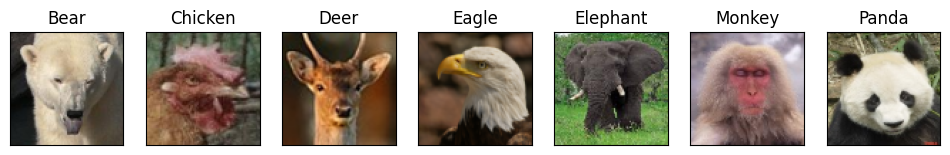

In [25]:
# use np.unique to get all unique values in the list of labels
labels = np.unique(data['label'])
### YOUR CODE GOES HERE

# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1,7, figsize=(12, 6))
### YOUR CODE GOES HERE

 
# make a plot for every label (equipment) type. The index method returns the 
# index of the first item corresponding to its search string, label in this case
for label in labels:
    # get the index of the first item corresponding to the label
    idx = data['label'].index(label)
    # get the corresponding image
    im = data['data'][idx]
    # get the corresponding subplot
    ax = axes.flatten()[labels.tolist().index(label)]
    # plot the image
    ax.imshow(im)
    # set the title of the subplot to the label
    ax.set_title(label)
    # remove the ticks
    ax.set_xticks([])
    ax.set_yticks([])

### YOUR CODE GOES HERE


In [12]:
# get the data and labels from pickle object
loaded = joblib.load(f'{base_name}_{width}x{width}px.pkl')
X = loaded['data']
y = loaded['label']
### YOUR CODE GOES HERE

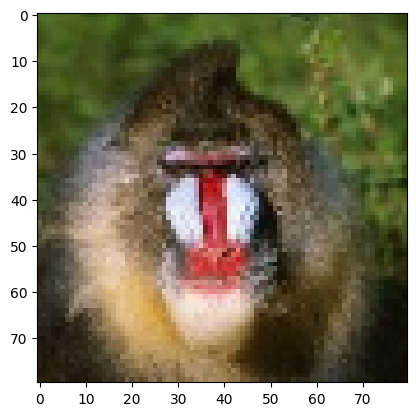

In [41]:
#split the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, random_state=42,shuffle=True)
### YOUR CODE GOES HERE
plt.imshow(X_train[0])

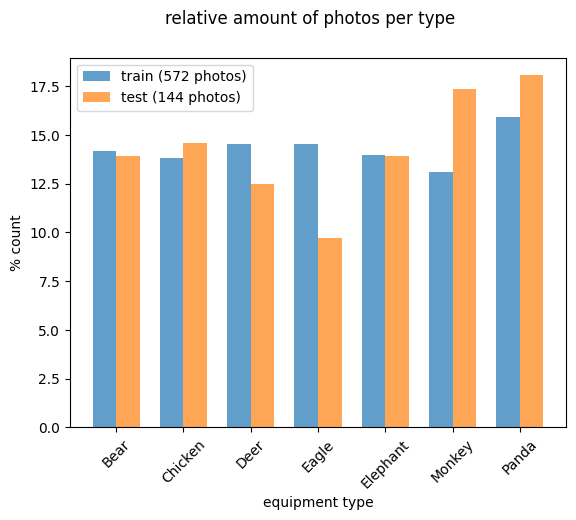

In [15]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
     
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
 
plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_test))
]);

(162, 194)
(1080,)


TypeError: Invalid shape (1080,) for image data

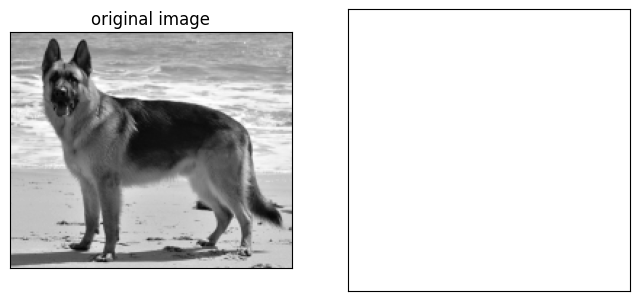

In [27]:
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale

dog = imread('./German_Shepherd.jpg', as_gray=True)
# https://en.wikipedia.org/wiki/German_Shepherd#/media/File:Kim_at_14_weeks.jpg

# scale down the image to one third
dog = rescale(dog, 1/3, mode='reflect')
print(dog.shape)
# calculate the hog and return a visual representation to 80x80 pixels
hog_image = hog(dog, pixels_per_cell=(16, 16), cells_per_block=(1, 1))
print(hog_image.shape)
### YOUR CODE GOES HERE

 
fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,6)
# remove ticks and their labels
[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False) 
    for a in ax]

# Create a subplot and plot original image and HOG image
ax[0].imshow(dog, cmap='gray')
ax[0].set_title('original image')
ax[1].imshow(hog_image, cmap='gray')
ax[1].set_title('HOG image');
### YOUR CODE GOES HERE

In [18]:
print('number of pixels: ', dog.shape[0] * dog.shape[1])
print('number of hog features: ', dog_hog.shape[0])

number of pixels:  31428


NameError: name 'dog_hog' is not defined

In [19]:
from sklearn.base import BaseEstimator, TransformerMixin
 
class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([skimage.color.rgb2gray(img) for img in X])
     
 
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

In [20]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
import skimage
 
# create an instance of each transformer
grayify = RGB2GrayTransformer()
hogify = HogTransformer(
    pixels_per_cell=(14, 14), 
    cells_per_block=(2,2), 
    orientations=9, 
    block_norm='L2-Hys'
)
scalify = StandardScaler()
 
'''
call fit_transform on each transform converting X_train step by step first convert RGB2Gray, 
then calculate HOG features and finally scale the images
'''
### YOUR CODE GOES HERE

'\ncall fit_transform on each transform converting X_train step by step first convert RGB2Gray, \nthen calculate HOG features and finally scale the images\n'

(19200,)


/home/balu/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.5972222222222222
[[16  0  0  2  0  0  2]
 [ 0 18  1  1  0  1  0]
 [ 3  0 10  0  0  5  0]
 [ 2  3  0  5  1  1  2]
 [ 5  8  0  0  6  0  1]
 [ 6  7  5  2  0  5  0]
 [ 0  0  0  0  0  0 26]]


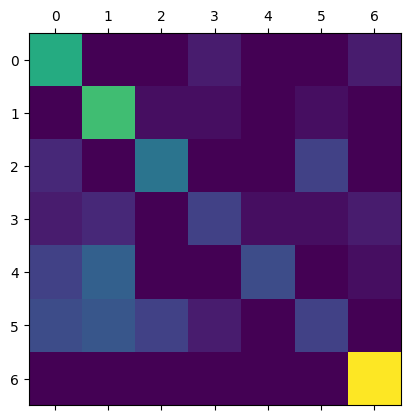

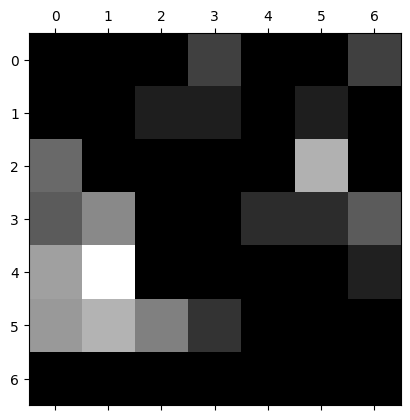

In [44]:
# initialise the any MLP classifier
from sklearn.neural_network import MLPClassifier
# import sgd
from sklearn.linear_model import SGDClassifier
# reshape X_train and X_test to 2d arrays
for i in range(len(X_train)):
    X_train[i] = X_train[i].reshape(-1)
for i in range(len(X_test)):
    X_test[i] = X_test[i].reshape(-1)
print(X_train[0].shape)

mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=10, alpha=0.0001)
mlp.fit(X_train, y_train)
mlp.predict(X_test)
mlp.score(X_test, y_test)
print(f"Accuracy: {mlp.score(X_test, y_test)}")
# print confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = mlp.predict(X_test)
conf_mx = confusion_matrix(y_test, y_pred)
print(conf_mx)
# plot confusion matrix
plt.matshow(conf_mx,)
plt.show()
# normalize confusion matrix
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
# fill diagonal with zeros to only keep errors
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()
### YOUR CODE GOES HERE



 ['Bear', 'Chicken', 'Deer', 'Eagle', 'Elephant', 'Monkey', 'Panda']


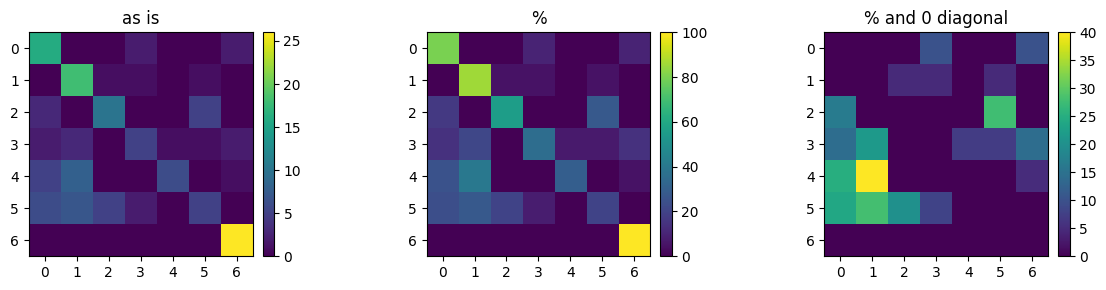

In [46]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
 
def plot_confusion_matrix(cmx, vmax1=None, vmax2=None, vmax3=None):
    cmx_norm = 100*cmx / cmx.sum(axis=1, keepdims=True)
    cmx_zero_diag = cmx_norm.copy()
 
    np.fill_diagonal(cmx_zero_diag, 0)
 
    fig, ax = plt.subplots(ncols=3)
    fig.set_size_inches(12, 3)
    [a.set_xticks(range(len(cmx)+1)) for a in ax]
    [a.set_yticks(range(len(cmx)+1)) for a in ax]
         
    im1 = ax[0].imshow(cmx, vmax=vmax1)
    ax[0].set_title('as is')
    im2 = ax[1].imshow(cmx_norm, vmax=vmax2)
    ax[1].set_title('%')
    im3 = ax[2].imshow(cmx_zero_diag, vmax=vmax3)
    ax[2].set_title('% and 0 diagonal')
 
    dividers = [make_axes_locatable(a) for a in ax]
    cax1, cax2, cax3 = [divider.append_axes("right", size="5%", pad=0.1) 
                        for divider in dividers]
 
    fig.colorbar(im1, cax=cax1)
    fig.colorbar(im2, cax=cax2)
    fig.colorbar(im3, cax=cax3)
    fig.tight_layout()
     
plot_confusion_matrix(conf_mx)
 
# the types appear in this order
print('\n', sorted(np.unique(y_test)))